In [1]:
import scanpy as sc
import numpy as np
import episcanpy as epi
import matplotlib.pyplot as plt

In [4]:
#!wget 'ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE194nnn/GSE194122/suppl/GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad.gz'

In [41]:
multiome = sc.read('GSE194122_openproblems_neurips2021_multiome_BMMC_processed.h5ad')
multiome

AnnData object with n_obs × n_vars = 69249 × 129921
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [6]:
multiome.var['feature_types']

AL627309.5                  GEX
LINC01409                   GEX
LINC01128                   GEX
NOC2L                       GEX
KLHL17                      GEX
                           ... 
GL000219.1-90062-90937     ATAC
GL000219.1-99257-100160    ATAC
KI270726.1-27152-28034     ATAC
KI270713.1-21434-22336     ATAC
KI270713.1-29629-30491     ATAC
Name: feature_types, Length: 129921, dtype: category
Categories (2, object): ['ATAC', 'GEX']

In [8]:
rna = multiome[:, multiome.var['feature_types'] == 'GEX']
rna

View of AnnData object with n_obs × n_vars = 69249 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

In [42]:
atac = multiome[:, multiome.var['feature_types'] == 'ATAC']
atac

View of AnnData object with n_obs × n_vars = 69249 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts'

# RNA

In [10]:
np.max(rna.layers['counts'])

7322.0

In [11]:
rna.obsm['X_umap'] = rna.obsm['GEX_X_umap'] 

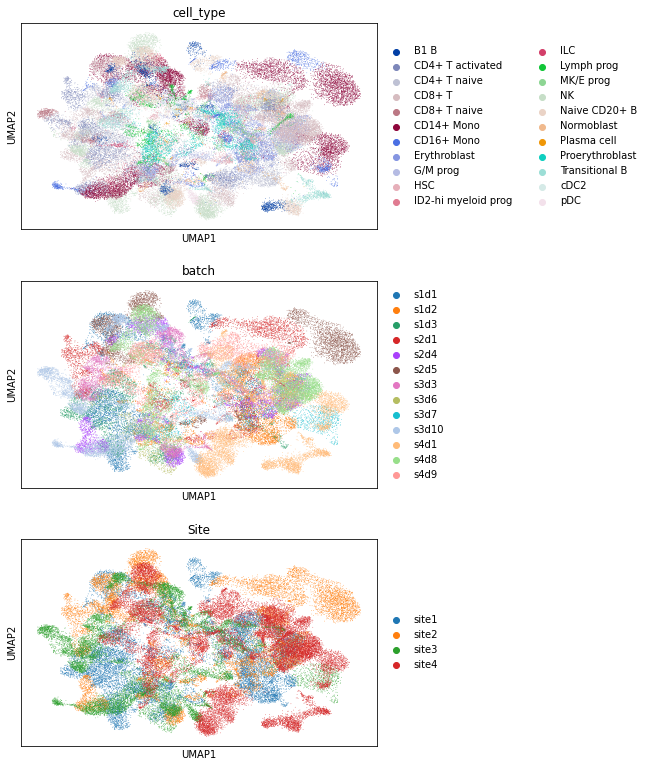

In [12]:
sc.pl.umap(rna, color=['cell_type', 'batch', 'Site'], ncols=1)

In [13]:
rna.X = rna.layers['counts'].copy()

In [14]:
sc.pp.normalize_total(rna, target_sum=1e4)

In [15]:
sc.pp.log1p(rna)

In [16]:
sc.pp.highly_variable_genes(rna, n_top_genes=4000, batch_key='batch')
rna

AnnData object with n_obs × n_vars = 69249 × 13431
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism', 'cell_type_colors', 'batch_colors', 'Site_colors', 'log1p', 'hvg'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_umap'
    layers: 'counts'

In [19]:
rna.write('../../data/neurips-multiome/rna.h5ad')

In [20]:
rna_hvg = rna[:, rna.var.highly_variable]
rna_hvg

View of AnnData object with n_obs × n_vars = 69249 × 4000
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism', 'cell_type_colors', 'batch_colors', 'Site_colors', 'log1p', 'hvg'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'X_umap'
    layers: 'counts'

In [21]:
rna_hvg.write('../../data/neurips-multiome/rna_hvg_batch.h5ad')

# ATAC

In [43]:
np.max(atac.X), np.max(atac.layers['counts'])

(1.0, 278.0)

In [44]:
atac.layers['binary'] = atac.X.copy()
sc.pp.normalize_total(atac, target_sum=1e4)
atac.layers['cpm'] = atac.X.copy()
atac.X = atac.layers['binary'].copy()
epi.pp.tfidf(atac)
atac.layers['tf-idf-binary'] = atac.layers['tf-idf']
atac.X = atac.layers['counts'].copy()
epi.pp.tfidf(atac)
atac.layers['tf-idf-counts'] = atac.layers['tf-idf']

In [45]:
atac

AnnData object with n_obs × n_vars = 69249 × 116490
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts', 'binary', 'cpm', 'tf-idf', 'tf-idf-binary', 'tf-idf-counts'

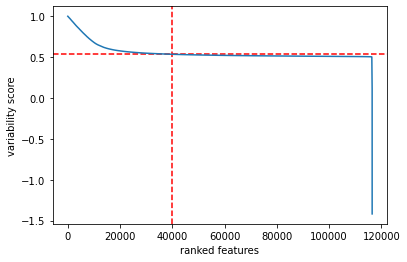

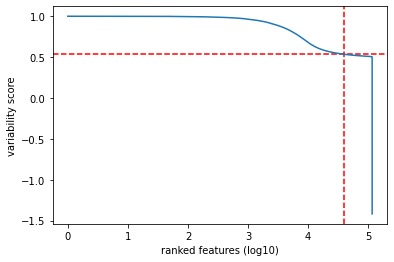

In [46]:
min_score_value = 0.532
nb_feature_selected = 40000
epi.pl.variability_features(atac, log=None, min_score=min_score_value, nb_features=nb_feature_selected)
epi.pl.variability_features(atac, log='log10', min_score=min_score_value, nb_features=nb_feature_selected)

In [47]:
atac.write('../../data/neurips-multiome/atac.h5ad')

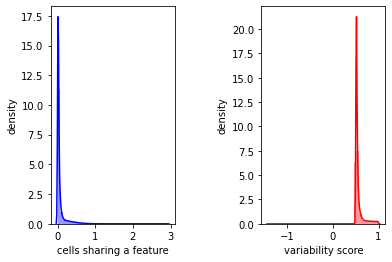

AnnData object with n_obs × n_vars = 69249 × 40002
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker'
    var: 'feature_types', 'gene_id', 'n_cells', 'prop_shared_cells', 'variability_score'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap'
    layers: 'counts', 'binary', 'cpm', 'tf-idf', 'tf-idf-binary', 'tf-idf-counts'

In [48]:
epi.pp.select_var_feature(atac, nb_features=nb_feature_selected)
atac

In [49]:
atac.X = atac.layers['binary'].copy()
epi.pp.tfidf(atac)
atac.layers['tf-idf-binary'] = atac.layers['tf-idf']
atac.X = atac.layers['counts'].copy()
epi.pp.tfidf(atac)
atac.layers['tf-idf-counts'] = atac.layers['tf-idf']

In [50]:
np.max(atac.layers['binary']), np.max(atac.layers['counts'])

(1.0, 32.0)

In [51]:
np.max(atac.layers['tf-idf-binary']), np.max(atac.layers['tf-idf-counts']), np.max(atac.layers['cpm'])

(0.03175322, 0.0454762, 161.29031)

In [52]:
atac.write('../../data/neurips-multiome/atac_hvf.h5ad')